In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Check for the Null values in the data and fill them accordingly.

In [3]:
df.isnull().any()

Hours     False
Scores    False
dtype: bool

there is no null values in the dataset

## Plot the Score distribution

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


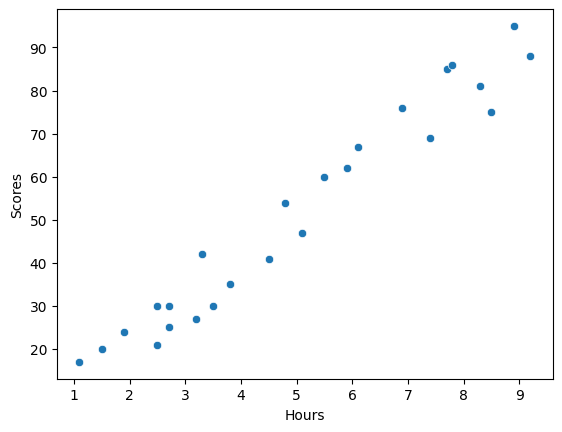

In [4]:
x = df['Hours']
y = df['Scores']
sns.scatterplot(x,y)
plt.show()

## Prepare data for Training

In [5]:
df.loc[df['Hours'] == df['Scores']]

,Hours,Scores


there is no repeatation in the dataset 
So nothing much to explore

## Splitting Data into Training and Testing sets

In [6]:
tr_df = df.iloc[0:-4]    #training set
ts_df = df.iloc[-4:]     #testing set
ts_df

,Hours,Scores
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## Train the model

In [7]:
x1 = tr_df['Hours']
y1 = tr_df['Scores']
a = sm.add_constant(x1)
result = sm.OLS(y1,a).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     419.5
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           2.06e-14
Time:                        22:54:21   Log-Likelihood:                -64.478
No. Observations:                  21   AIC:                             133.0
Df Residuals:                      19   BIC:                             135.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1863      2.551      1.249      0.227      -2.153       8.525
Hours          9.5009      0.464     20.482      0.000       8.530      10.472
==============================================================================
Omnibus:                        4.364   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                1.471
Skew:                           0.002   Prob(JB):                        0.479
Kurtosis:                       1.704   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the Regression Line

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


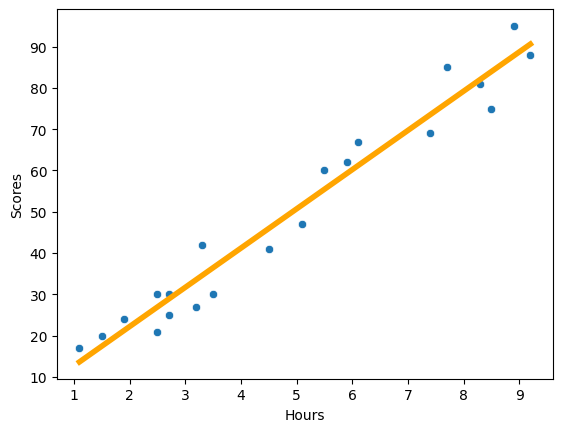

In [8]:
#regression line
yhat = 9.5009*x1+3.1863
sns.scatterplot(x1,y1)
sns.lineplot(x1,yhat, color='orange', lw = 4)
plt.show()

## Calculate the R-squared value for the model.

its there in the table (0.957)

In [19]:
ts_df

,Hours,Scores
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


## lets test it 

In [20]:
#regression line
yhat = 9.5009*x1+3.1863
var = ts_df['Hours']
lst1 = []                            #crete an empty list and append predicted values in it
for i in var:
    value = 9.5009*i+3.1863
    lst1.append(value)
 
lst2 = []                           #create empty list and append test values in it
for i in ts_df['Scores']:
    lst2.append(i)
    
# type(lst2)
dict = {"score_predict": lst1,               # make a dict with predicted values and observed values to make a dataframe
       "score_obs":lst2}
check = pd.DataFrame(dict)
check

,score_predict,score_obs
0,48.79062,54
1,39.28972,35
2,68.74251,76
3,77.29332,86


# COMPLETED!!